# Aliases

No, not the TV show.

It is nice to be able to avoid typing something over and over - like getting `pt` into units of `GeV` in ATLAS.

In [1]:
import sys
sys.path = ['..'] + sys.path
from hep_tables import xaod_table,make_local
from func_adl import EventDataset
import matplotlib.pyplot as plt

from dataframe_expressions import define_alias

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [2]:
dataset = EventDataset('localds://mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00')
df = xaod_table(dataset)

# Defining short cuts for collections and the like

Lets do something nicer than `df.Electroncs("Electrons")` - that text is very important for the backend (e.g. so it knows which electrons to go after), but for us, as a user. Who cares, we just want electrons.

In [3]:
define_alias('.', 'eles', lambda e: e.Electrons("Electrons"))

In [4]:
%%time
pts = make_local(df.eles.pt/1000.0)

Wall time: 3min 11s


i:\gwatts\code\irishep\hep_tables\.venv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
i:\gwatts\code\irishep\hep_tables\.venv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


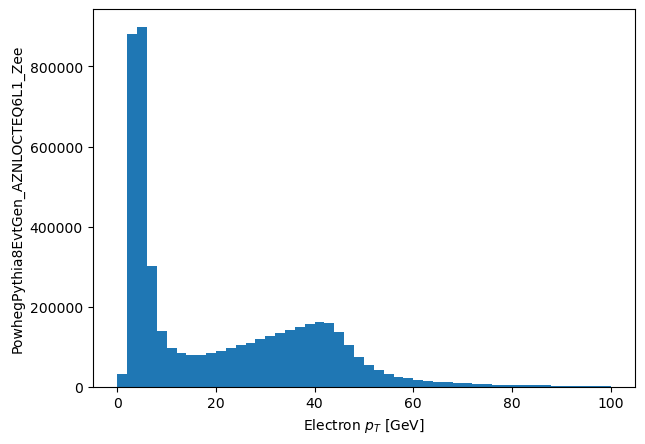

In [5]:
plt.hist(pts.flatten(), range=(0, 100), bins=50)
plt.xlabel('Electron $p_T$ [GeV]')
_ = plt.ylabel('PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee')

In [6]:
help(define_alias)

Help on function define_alias in module dataframe_expressions.alias:

define_alias(base_obj: 'str', name: 'str', func_define: 'Callable[[DataFrame], DataFrame]')
    Define an alias that can be used as a short cut for a reference later on. For example:
    
        ```
        df = DataFrame()
        define_alias (".jets", "pts", lambda o: o.pt/1000.0)
        ```
    
    When you write `df.jets.pts` it is the same as writing `df.jets.pt/1000.0`.
    
    If you've already used an alias in constructing a `DataFrame` then it will not be
    filled: alias are resolved as the DAG is being constructed, not when it is rendered.
    
    ## Adding aliases of the same name
    
    This implementation does no checking as things are added. You can have different base names,
    and if the base_obj's are different they will match differently, as you would expect.
    But they are evaluated last one entered first, so if you enter a complete wildcard, nothing
    else will ever get looked at. I

A few things to note:
    
    - You could define a _personality_ file for your code or analysis. A set of short-hands that are easily used by everyone, and it would keep the backend running at full fidelity.
    - The replacement is one as the DAG is constructed. A constructed DAG will not get the alias replacement for anything defined after it was created.
    - What is also cool about this is any backend that uses `dataframe_expressions` now gets this feature with no work of their own.

## Defining and redefining leaves

Lets create a new leaf on electrons called `pt` that is just `pt / 1000.0`. Note that I'm now hiding the original leaf!!! I could define a leaf like `pts` and always use that, and that would also work just fine.

In [7]:
define_alias('', 'pt', lambda o: o.pt / 1000.0)

In [8]:
%%time
pts = make_local(df.eles.pt)

Wall time: 1min 52s


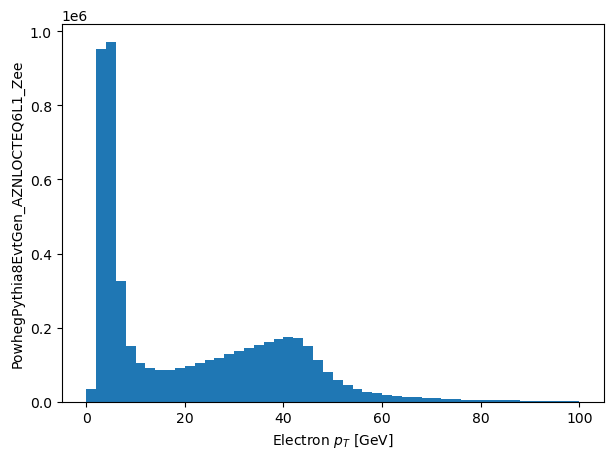

In [9]:
plt.hist(pts.flatten(), range=(0, 100), bins=50)
plt.xlabel('Electron $p_T$ [GeV]')
_ = plt.ylabel('PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee')